# Heatmap with customized dendrograms

In [1]:
library(dendextend)
library(vegan)
library(gplots)
library(RColorBrewer)


---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree

Loading required package: permute

Attaching package: ‘permute’

The following object is masked from ‘package:dendextend’:

    shuffle

Loading required package: lattice
This is vegan 2.5-2

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
## import species dendrogram
dm <- read.csv("Phylogeny_Rhamnaceae.tsv",check.names=F,row.names=1, sep="\t")
metadata <- read.csv("MetaData_Rhamnaceae.txt",sep="\t")

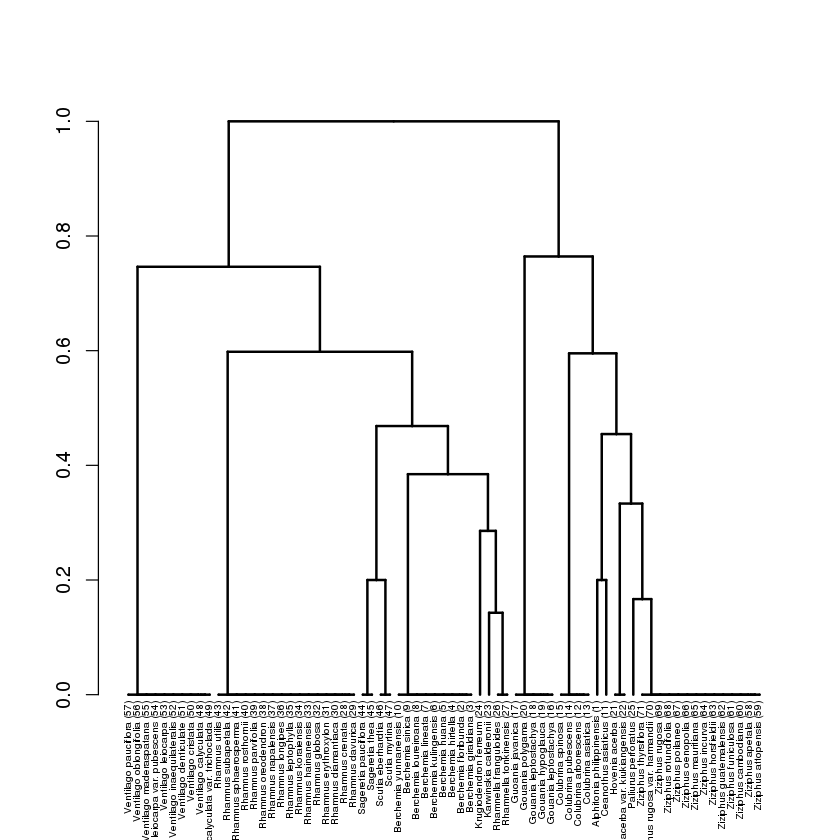

In [3]:
#dend <-  dm %>% as.dist %>%
#  hclust(method = "complete") %>% as.dendrogram
PhyloDist <- vegdist(dm, method="bray", binary=T,na.rm = TRUE)
dend <-  PhyloDist %>% as.dist %>% 
  hclust(method="average") %>% as.dendrogram %>%
  set("branches_lwd", 2) %>%
  set("labels_colors","black") %>% 
  set("labels_cex", c(0.5)) 
plot(dend)

In [4]:
genera <- metadata$Genus[match(rownames(dm)[order.dendrogram(dend)],metadata$filename)]
gen_cols <- c("purple3", "orangered2","purple","slateblue1","black","steelblue",
                "tomato","red","royalblue4","rosybrown2","yellow","tan1","darkorange","green","blue")
true_species_cols <- gen_cols[as.numeric(genera)]

In [5]:
## import chemical class dendrogram
subcl <- read.table("classlist_subclass.tsv", header=T, row.names=1,sep="\t") 
ft <- read.csv("featuretable_subclasses_cutoff1000.tsv",sep="\t",row.names = 1)
ft <- ft[which(rownames(ft) %in% rownames(subcl)),]
ft <- t(ft)
subcl <- subcl[which(rownames(subcl) %in% colnames(ft)),]
ft <- ft[,match(rownames(subcl),colnames(ft))]
ft_norm <- ft/rowSums(ft) 

In [6]:
bioSynDistComp <- vegdist(subcl, method="bray", binary=T,na.rm = TRUE)
clus_Comp <- hclust(bioSynDistComp, method="average") 

In [7]:
chemdend <-  clus_Comp %>% as.dendrogram %>% set("branches_lwd", 2)

In [8]:
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 15)

In [9]:
generarow <- metadata$Genus[match(gsub("[.]"," ",rownames(ft)),gsub('[^[:alnum:]]', ' ', metadata$filename))]
Rowcols <- gen_cols[as.numeric(generarow)]

In [10]:
colpal <- "Dark2"
chemcols <- c(rep(brewer.pal(8, colpal)[1],5),
              rep(brewer.pal(8, colpal)[2],13), 
              brewer.pal(8, colpal)[3:6], 
              rep(brewer.pal(8, colpal)[7],4),
              rep("black",1),
              rep(brewer.pal(8, colpal)[8],17))[match(colnames(ft),colnames(ft)[order.dendrogram(chemdend)])]

In [12]:
pdf(file="SubclassHeatMapDendrogram_Phylogeny.pdf", width=11, height=9)
heatmap.2(ft, Rowv=dend, Colv=chemdend, cexRow = 0.5,scale="row",col = my_palette,RowSideColors=Rowcols,ColSideColors=chemcols,tracecol=NA) 
dev.off()

png 
  2